In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib

# Charger le dataset
df = pd.read_csv('../data/student-mat.csv', sep=';')

In [2]:
# Pass if G3 >=10, Fail if G3 <10
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [3]:
# Sélection des features utiles
features = ['sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob',
            'reason','guardian','traveltime','studytime','failures','schoolsup','famsup',
            'paid','activities','nursery','higher','internet','romantic','famrel','freetime',
            'goout','Dalc','Walc','health','absences','G1','G2']

X = df[features]
y = df['pass_fail']

In [4]:
# Encoder les colonnes catégoriques avec OrdinalEncoder
cat_cols = X.select_dtypes(include='object').columns

# Initialiser l'encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit et transformer les données
X[cat_cols] = encoder.fit_transform(X[cat_cols])

print("Colonnes encodées:", cat_cols.tolist())
print("Catégories par colonne:")
for i, col in enumerate(cat_cols):
    print(f"{col}: {encoder.categories_[i]}")

Colonnes encodées: ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Catégories par colonne:
sex: ['F' 'M']
address: ['R' 'U']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['at_home' 'health' 'other' 'services' 'teacher']
reason: ['course' 'home' 'other' 'reputation']
guardian: ['father' 'mother' 'other']
schoolsup: ['no' 'yes']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['no' 'yes']
higher: ['no' 'yes']
internet: ['no' 'yes']
romantic: ['no' 'yes']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5388\2974863519.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_cols] = encoder.fit_transform(X[cat_cols])


In [5]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Entraînement arbre de décision
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
# Prédiction
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9367088607594937


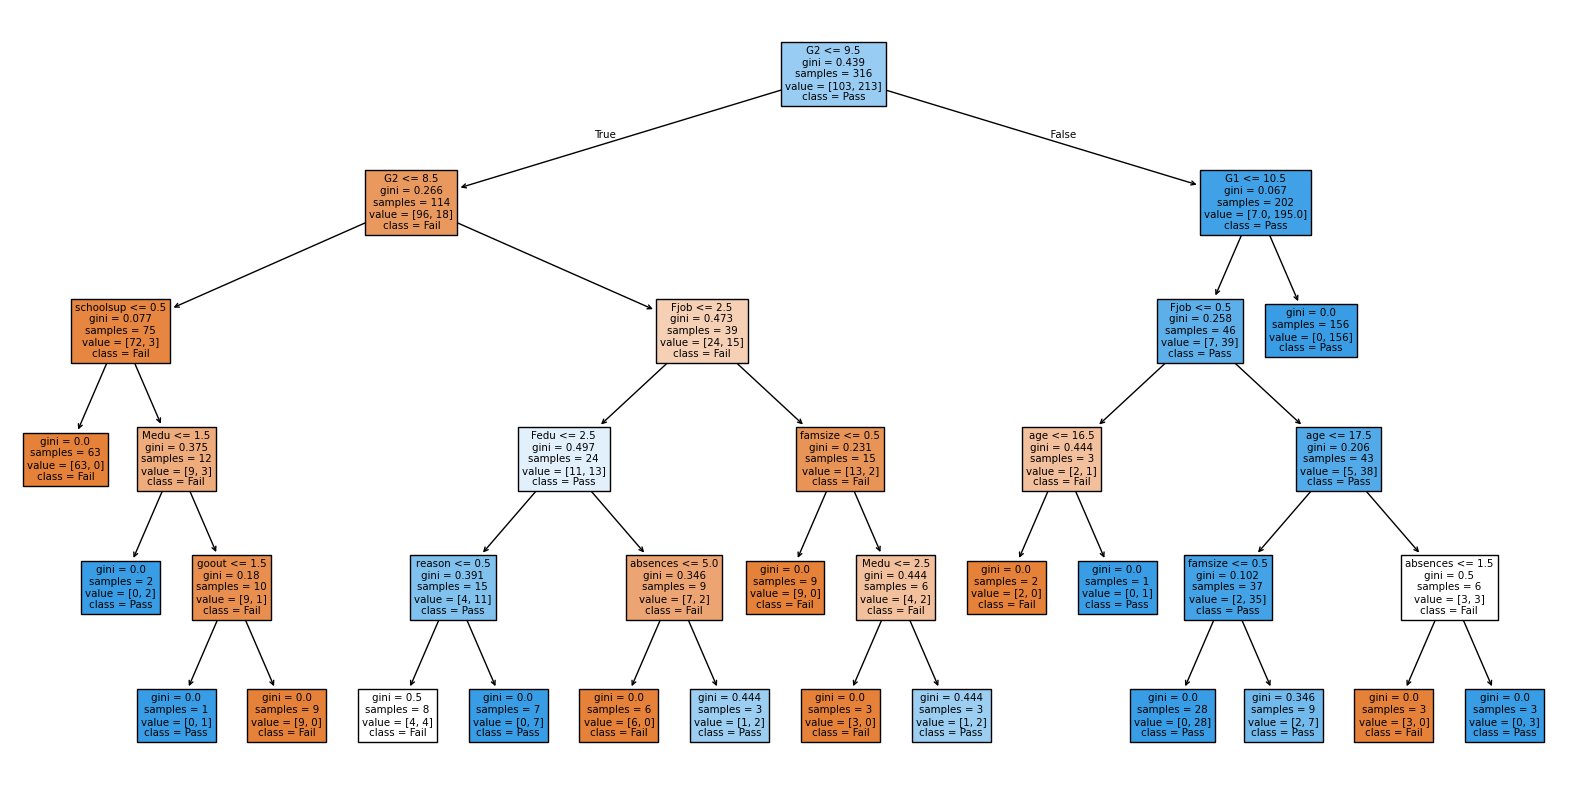

In [8]:
# Visualisation de l'arbre
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Fail','Pass'], filled=True)
plt.show()

In [10]:
# Sauvegarde du modèle et de l'encoder
joblib.dump(model, '../models/decision_tree.pkl')
joblib.dump(encoder, '../models/ordinal_encoder.pkl')

['../models/ordinal_encoder.pkl']